In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# 방법1
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])


In [ ]:
# 방법2
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [ ]:
model.weights

In [ ]:
model.build(input_shape=(None, 3))
model.weights

In [ ]:
model.summary()

In [ ]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,))) # 매개변수의 값은 배치 크기가 아닌 각 샘플의 크기여야 함
model.add(layers.Dense(64, activation="relu"))
model.summary()

In [ ]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

In [21]:
inputs = keras.Input(shape=(3,), name="my_input")
feature = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(feature)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_7 (Dense)             (None, 64)                256       
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [22]:
feature.shape

TensorShape([None, 64])

In [23]:
vocabulary_size = 10000
num_tag = 100
num_departments = 4

# 모델의 입력을 정의
title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size), name="text_body")
tags = keras.Input(shape=(num_tag,), name="tags")

# 입력 특성을 하나의 텐서 feature로 연결
feature = layers.Concatenate()([title, text_body, tags])
# 중간층을 적용하여 입력 특성을 더 풍부한 표현으로 재결합
feature = layers.Dense(64, activation="relu")(feature)

# 모델의 출력을 정의
priority = layers.Dense(1, activation="sigmoid", name="priority")(feature)
department = layers.Dense(num_departments, activation="softmax", name="department")(feature)

# 모델의 입력과 출력의 지정하여 생성
model = keras.Model(inputs=[title, text_body, tags],
                    outputs=[priority, department])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate_2 (Concatenate)    (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

In [24]:
import numpy as np

num_samples = 1280

# 더미 입력 데이터
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tag))

In [25]:
# 더미 타겟 데이터
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.random(size=(num_samples, num_departments))

In [26]:
# 모델 설정
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=["mean_absolute_error", "accuracy"])
# 모델 훈련
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
# 모델 평가
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
# 예측
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 1ms/step


In [27]:
# 입력과 출력이 많아 순서에 신경을 쓰고 싶지 않은 경우 딕셔너리로 전달할 수 있다.
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error",
                    "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_squared_error"],
                       "department":["categorical_crossentropy"]})

model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          {"priority": priority_data,
           "department": department_data},
           epochs=1)

model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               {"priority": priority_data,
                "department": department_data})

priority_preds, department_preds =\
      model.predict({"title": title_data,
                     "text_body": text_body_data,
                     "tags": tags_data})

40/40 [==============================] - 0s 1ms/step


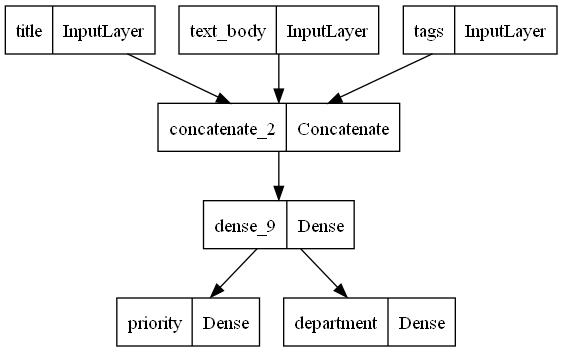

In [28]:
keras.utils.plot_model(model, "ticket_classifier.png")

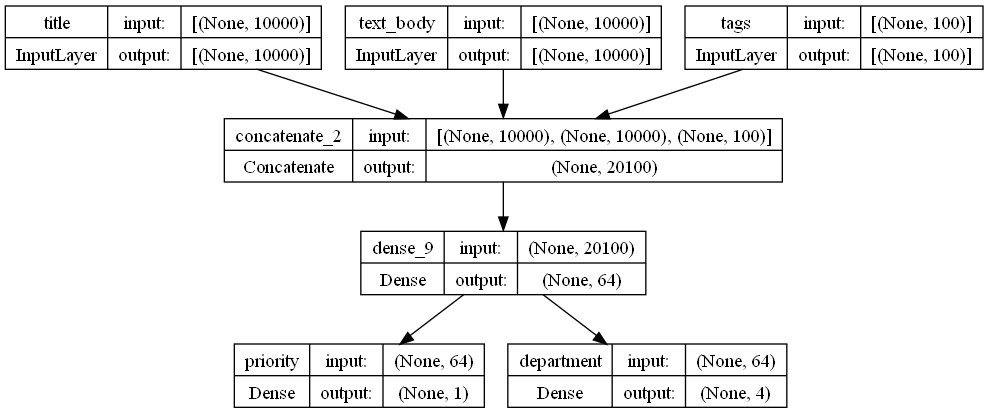

In [29]:
keras.utils.plot_model(model, "ticket_classifier.png", show_shapes=True)

In [30]:
model.layers

In [31]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [32]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate_2')>

In [33]:
# Layer[4]의 출력을 features에 저장, 중간 Dense층
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)
new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty]
)

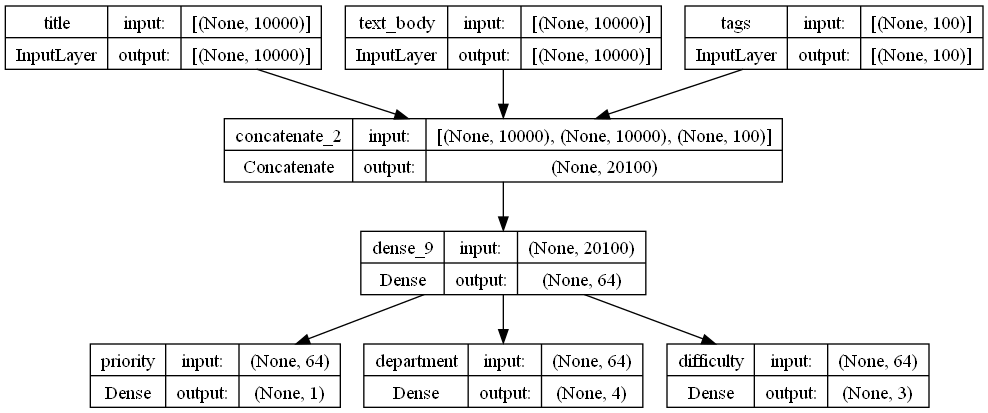

In [34]:
keras.utils.plot_model(new_model, "ticket_classifier.png", show_shapes=True)

Model 서브클래싱

In [35]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [36]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [37]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 0s 2ms/step


### 여러 방식을 혼합하여 사용하기


#### 서브클래싱한 모델을 포함하는 함수형 모델 만들기

In [39]:
# 서브클래싱
class Classifier(keras.Model):
    
    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)
        
    def call(self, inputs):
        return self.dense(inputs)

# 함수형 API
inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

#### 함수형 모델을 포함하는 서브클래싱 모델 만들기

In [40]:
# 함수형 API
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

# 서브클래싱
class MyModel(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier
    
    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)
    
model = MyModel()